# The Great Indian Data Scientist Hiring Challenge

### Author: Amitrajit Bose
- [Mail Me](amitrajitbose9@gmail.com)
- [Connect](https://linkedin.com/in/amitrajitbose)
- [More](https://amitrajitbose.github.io/)
- [Github](https://github.com/amitrajitbose)

<p align="right">
  <img src="https://amitrajitbose.github.io/img/profile.jpg">
</p>

In [0]:
from google.colab import files
#files.upload()

In [132]:
#!unzip 88b2c062-9-Dataset.zip
!ls

88b2c062-9-Dataset.zip	Dataset  sample_data  submit.csv


In [0]:
import numpy as np
import pandas as pd

In [134]:
df = pd.read_csv('Dataset/Train.csv')
dftest = pd.read_csv('Dataset/Test.csv')
dfsample = pd.read_csv('Dataset/sample_submission.csv')
df.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category
0,15001,VENDOR-1676,GL-6100410,83.24,Artworking/Typesetting Production Jun 2009 Cha...,CLASS-1963
1,15002,VENDOR-1883,GL-2182000,51.18,Auto Leasing Corporate Services Corning Inc /N...,CLASS-1250
2,15004,VENDOR-1999,GL-6050100,79.02,Store Management Lease/Rent Deltona Corp Real ...,CLASS-1274
3,15005,VENDOR-1771,GL-6101400,48.50,Store Construction General Requirements Coloni...,CLASS-1522
4,15006,VENDOR-1331,GL-2182000,63.35,Jul 2015 Aydin Corp Contingent Labor/Temp Labo...,CLASS-1376


In [135]:
import nltk, string
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
from nltk.corpus import stopwords

def get_tokens(s: str) -> list:
  """
  Tokenizes a name string and returns the list of tokens
  """
  table = str.maketrans(
      string.punctuation, ' '*len(string.punctuation))
  s = s.lower().translate(table)
  tokens = [w for w in s.split() if w.isalpha()]
  return tokens

def text_preprocess(text):
  """
  Preprocess a string by removing punctuations,
  stopwords, stemming the tokens, etc. Returns a
  space separated string.
  """
  tokens = get_tokens(text)
  tokens = [x.lower() for x in tokens]
  table = str.maketrans(' ', ' ', string.punctuation)
  stripped = [w.translate(table) for w in tokens]
  # remove remaining tokens that are not alphabetic
  words = [word for word in stripped if word.isalpha()]
  stop_words = set(stopwords.words('english'))
  words = [porter.stem(w) for w in words if not w in stop_words]
  return ' '.join(words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [136]:
df['text'] = df.apply(lambda x: text_preprocess(x['Item_Description']), axis=1)
df.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category,text
0,15001,VENDOR-1676,GL-6100410,83.24,Artworking/Typesetting Production Jun 2009 Cha...,CLASS-1963,artwork typeset product jun champion part inc ...
1,15002,VENDOR-1883,GL-2182000,51.18,Auto Leasing Corporate Services Corning Inc /N...,CLASS-1250,auto leas corpor servic corn inc ny mar auto l...
2,15004,VENDOR-1999,GL-6050100,79.02,Store Management Lease/Rent Deltona Corp Real ...,CLASS-1274,store manag leas rent deltona corp real estat ...
3,15005,VENDOR-1771,GL-6101400,48.50,Store Construction General Requirements Coloni...,CLASS-1522,store construct gener requir coloni trust iii ...
4,15006,VENDOR-1331,GL-2182000,63.35,Jul 2015 Aydin Corp Contingent Labor/Temp Labo...,CLASS-1376,jul aydin corp conting labor temp labor contin...


In [137]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=5, norm='l2', ngram_range=(1, 2), stop_words='english')
vectorizer.fit(df.text.tolist())

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=5, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [0]:
#df['text_vector'] = df.apply(lambda x: vectorizer.transform(x['text'].split()), axis=1)
text_features = vectorizer.fit_transform(df.text).toarray()
labels = df.Product_Category

In [0]:
one_hot_labels = list(set(labels))

def encode_labels(lab,one_hot_labels):
  return one_hot_labels.index(lab)

In [140]:
from tqdm import tqdm_notebook as tqdm
newlabels = []
for i in tqdm(labels):
  newlabels.append(encode_labels(i, one_hot_labels))

In [0]:
features = text_features.tolist()

In [142]:
maxamt = max(df.Inv_Amt)
minamt = min(df.Inv_Amt)
k = 0
for i in tqdm(df.Inv_Amt):
  scaled = (i-minamt)/(maxamt-minamt)
  features[k].insert(0,scaled)
  k += 1
print(len(features),'X',len(features[0]))

5566 X 1500


In [143]:
print("Feature Vector Shape: ", len(features[0]))

Feature Vector Shape:  1500


In [0]:
featuresfinal = np.array(features)
labelsfinal = np.array(newlabels)


In [0]:
def reverse_encode(i, one_hot):
  return one_hot[i]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(featuresfinal, labelsfinal, test_size=0.2, random_state=42)

In [147]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((4452, 1500), (1114, 1500), (4452,), (1114,))

## Model Selection

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of 

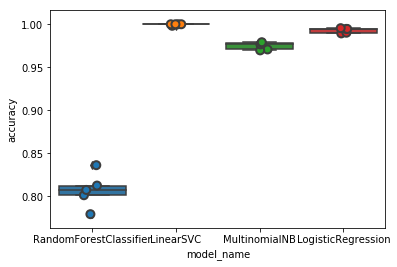

In [149]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [150]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.999645
LogisticRegression        0.992835
MultinomialNB             0.974879
RandomForestClassifier    0.807332
Name: accuracy, dtype: float64

## Model Evaluation

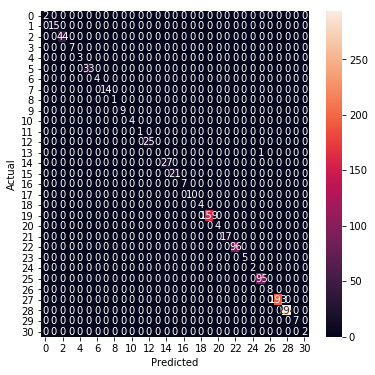

Train:  1.0
Test:  0.9991023339317774


In [151]:
model = LinearSVC()
X_train, X_test, Y_train, Y_test, indices_train, indices_test = train_test_split(featuresfinal, labelsfinal, df.index, test_size=0.2, random_state=42)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(Y_test, Y_pred)

fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print("Train: ", model.score(X_train, Y_train))
print("Test: ",model.score(X_test, Y_test))

## Generate Test CSV

In [152]:
idx = []
category = []
for i in tqdm(dftest.itertuples()):
  idx.append(i.Inv_Id)
  text = i.Item_Description
  f = vectorizer.transform([text]).toarray().tolist()
  f[0].insert(0,i.Inv_Amt)
  x = model.predict(f)[0]
  category.append(reverse_encode(x, one_hot_labels))
  

In [153]:
print(len(idx), len(category))

2446 2446


In [154]:
submit = pd.DataFrame({'Inv_Id':idx, 'Product_Category':category})
submit.head()

,Inv_Id,Product_Category
0,15003,CLASS-1805
1,15008,CLASS-1805
2,15013,CLASS-1805
3,15019,CLASS-1805
4,15020,CLASS-1758


In [0]:
submit.to_csv('./submit.csv', index=0)

In [0]:
#files.download('submit.csv')